In [1]:
# Install necessary libraries
!pip install numpy matplotlib tensorflow
!pip install seaborn

# Required imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import urllib.request
import gzip
import os

# Suppress TensorFlow warnings
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

# Set matplotlib style
plt.style.use('ggplot')

# Suppress TensorFlow warnings
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)



In [2]:
import os
import urllib.request
import gzip

def download_and_extract_mnist():
    base_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/"
    files = {
        "train_images": "train-images-idx3-ubyte.gz",
        "train_labels": "train-labels-idx1-ubyte.gz",
        "test_images": "t10k-images-idx3-ubyte.gz",
        "test_labels": "t10k-labels-idx1-ubyte.gz",  # Corrected filename
    }

    # Create a directory for the dataset
    if not os.path.exists('./mnist_data'):
        os.makedirs('./mnist_data')

    # Download and extract each file
    for key, filename in files.items():
        url = base_url + filename
        file_path = os.path.join('./mnist_data', filename)
        print(f"Downloading {filename}...")

        # Download the file if it doesn't already exist
        if not os.path.exists(file_path):
            urllib.request.urlretrieve(url, file_path)

        # Extract the file
        print(f"Extracting {filename}...")
        with gzip.open(file_path, 'rb') as f_in:
            with open(file_path.replace('.gz', ''), 'wb') as f_out:
                f_out.write(f_in.read())




In [3]:
# Helper functions to load MNIST data
def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        f.read(16)  # Skip header
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28) / 255.0


In [4]:
def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        f.read(8)  # Skip header
        return np.frombuffer(f.read(), dtype=np.uint8)


In [5]:
# Download, extract, and load data
download_and_extract_mnist()
#load data
X_train = load_mnist_images('./mnist_data/train-images-idx3-ubyte')
y_train = load_mnist_labels('./mnist_data/train-labels-idx1-ubyte')
X_test = load_mnist_images('./mnist_data/t10k-images-idx3-ubyte')
y_test = load_mnist_labels('./mnist_data/t10k-labels-idx1-ubyte')

# Preprocess data
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten images to 1D
X_test_flat = X_test.reshape(X_test.shape[0], -1)


Extracting train-images-idx3-ubyte.gz...
Extracting train-labels-idx1-ubyte.gz...
Extracting t10k-images-idx3-ubyte.gz...
Extracting t10k-labels-idx1-ubyte.gz...


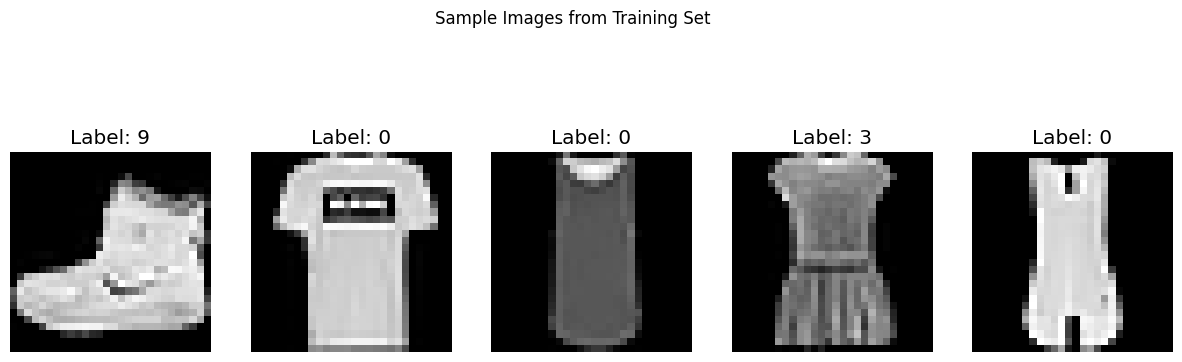

In [6]:
# Display some sample images with labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.suptitle("Sample Images from Training Set")
plt.show()

In [7]:
# Define the model
tf.random.set_seed(1234)
model = Sequential([
    Dense(25, activation='relu', input_shape=(784,), name="L1"),
    Dense(15, activation='relu', name="L2"),
    Dense(10, activation='softmax', name="L3"),  # Softmax for classification
], name="my_model")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model and store training history
history = model.fit(X_train_flat[:5000], y_train[:5000], epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3794 - loss: 1.7859 - val_accuracy: 0.6780 - val_loss: 0.9107
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6936 - loss: 0.8716 - val_accuracy: 0.7860 - val_loss: 0.6232
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7856 - loss: 0.6479 - val_accuracy: 0.8240 - val_loss: 0.5366
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8150 - loss: 0.5628 - val_accuracy: 0.8370 - val_loss: 0.4866
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.5142 - val_accuracy: 0.8470 - val_loss: 0.4603
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8393 - loss: 0.4776 - val_accuracy: 0.8570 - val_loss: 0.4384
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8511 - loss: 0.4495 - val_accuracy: 0.8560 - val_loss: 0.4269
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8596 - loss: 0.4268 - val_accuracy: 0.

In [10]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

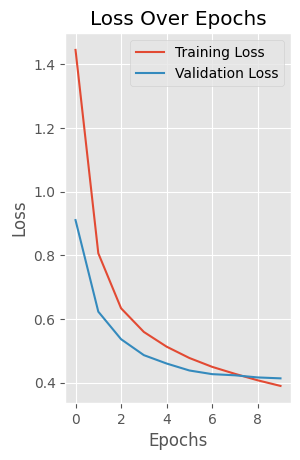

In [11]:
# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


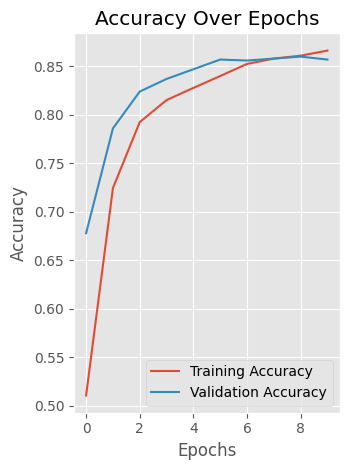

In [12]:
# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_flat[:1000], y_test[:1000])
print(f"Test Accuracy: {accuracy*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8175 - loss: 0.4949 
Test Accuracy: 80.70%


In [14]:
# Predict on a few test samples
num_samples = 5
predictions = model.predict(X_test_flat[:num_samples])
predicted_labels = np.argmax(predictions, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


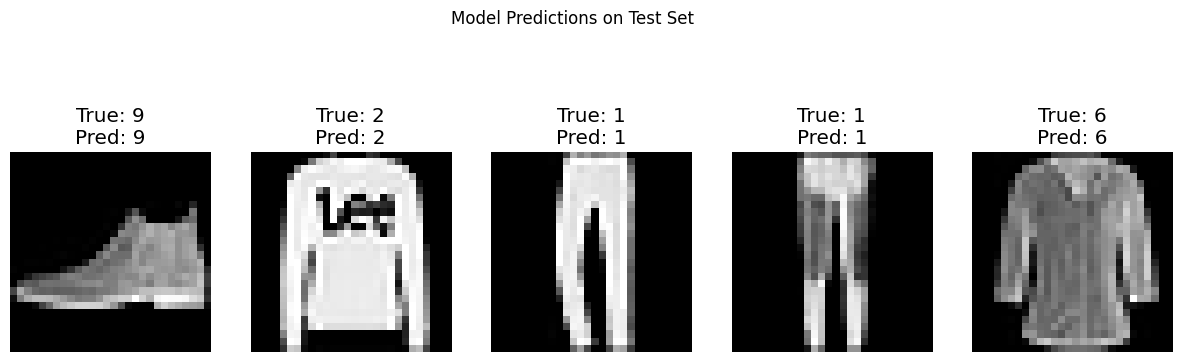

In [15]:
# Display predictions with actual labels
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i], cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    ax.axis('off')
plt.suptitle("Model Predictions on Test Set")
plt.show()